In [7]:
!pip install pytesseract

In [8]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,085 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [201]:
import cv2
import pytesseract
import re
import pandas as pd
import matplotlib.pyplot as plt

# First Image

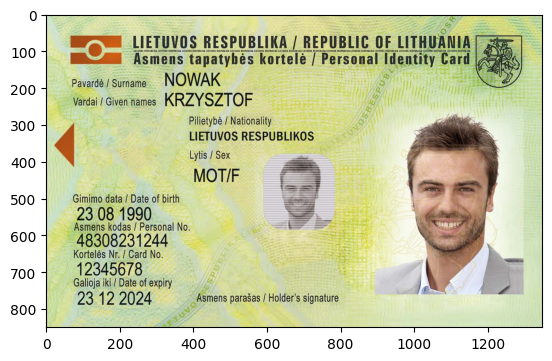

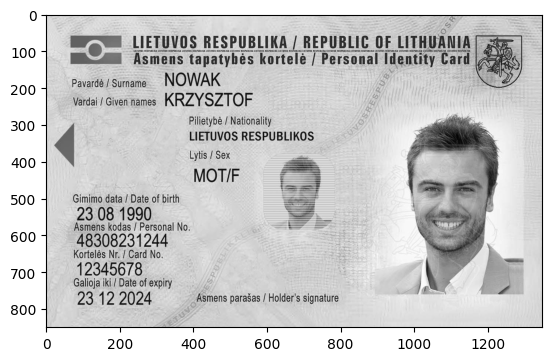

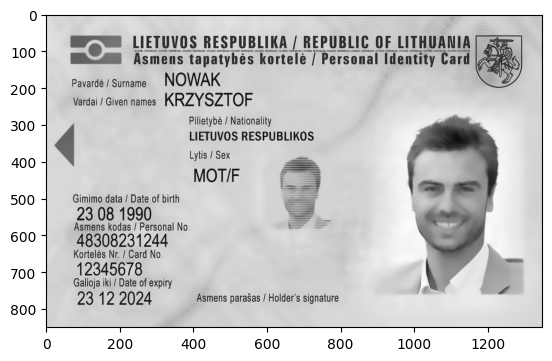

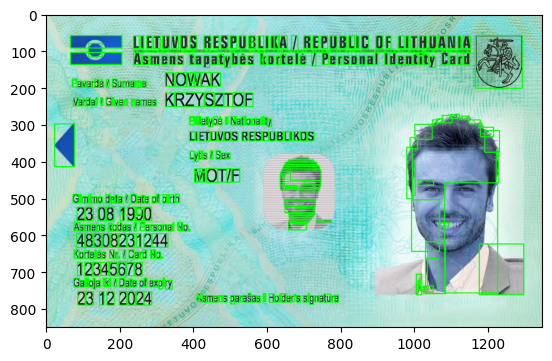

m—48 Asmens tapatybes kortele / Personal Identity Card
Pavarde / Surname NOWAK

Vardai / Given names KRZYSZTOF

Mow LIETUVOS RESPUBLIKA / REPUBLIC OF LITHUANIA j3

 

Pilietybé / Nationality
LIETUVOS RESPUBLIKOS
Lytis / Sex —
MOT/F i
Gimimo data / Date of birth 
23 08 1990  
Asmens kodas / Personal No 
48308231244
Kortelés Nr. / Card No
12345678

Galioja iki / Date of expiry

23 12 2024 Asmens parasas / Holder's signature

 



In [204]:
image_path = '//content/ID1.jpeg'
img1 = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
plt.imshow(denoised, cmap='gray')
plt.show()

edges = cv2.Canny(denoised, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img1, cmap='gray')
plt.show()

text = pytesseract.image_to_string(denoised)
text = text.replace('=', '')
text = text.replace(':', '')
text = text.replace('_', '')
text = text.replace('-', '')
#text.strip()
print(text)

In [205]:
def extract_data(text):
    patterns = {
    'Surname': r'Pavarde / Surname\s*(.+)',
    'Given names': r'Vardai / Given names\s*(.+)',
    'Nationality': r'Pilietybé / Nationality\s*(.+)',
    'Date of birth': r'Gimimo data / Date of birth\s*(\d{2} \d{2} \d{4})',
    'Personal No': r'Asmens kodas / Personal No\s*(\d+)'
}

    data = {}

    for field, pattern in patterns.items():
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            data[field] = match.group(1).strip()
        else:
            data[field] = 'Not Found'

    df = pd.DataFrame([data])

    return df

df = extract_data(text)
df

,Surname,Given names,Nationality,Date of birth,Personal No
0,NOWAK,KRZYSZTOF,LIETUVOS RESPUBLIKOS,23 08 1990,48308231244


In [172]:
df.to_csv('output.csv', index=False)

# Second Image

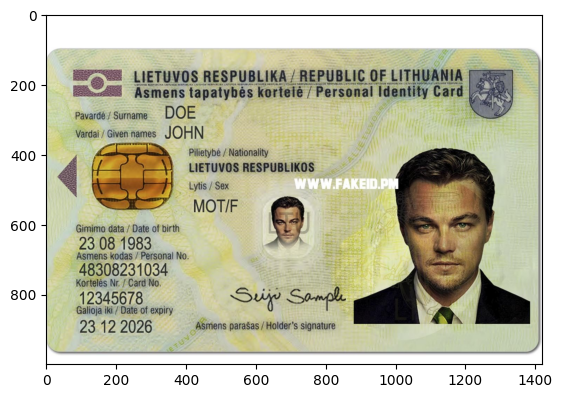

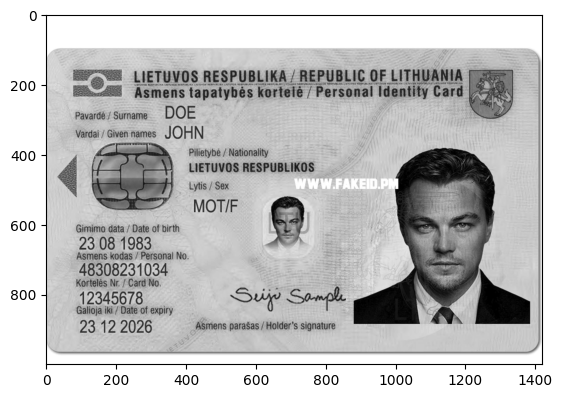

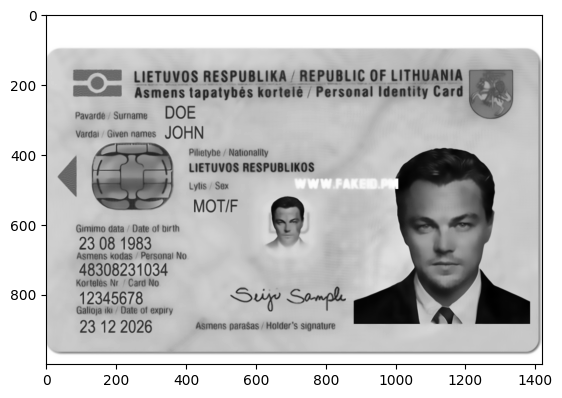

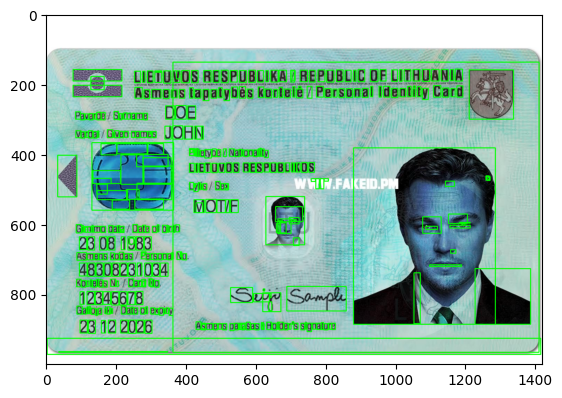

ee LIETUVOS RESPUBLIKA / REPUBLIC OF LITHUANIA
Asmens tapatybes kortelé / Personal Identity Card

Pavarde Surname DOE
Vardai / Given names JOHN
(“La

Pilietybe / Nationality

 

LIETUVOS RESPUBLIKOS
Lylis / Sex

w)
7 MOTIF
Gimimo data / Date of birth
23 08 1983

Asmens kodas / Persona! No

48308231034
Kortelés Nr / Card No S ‘
1 a iia we

23 12 2026 Asmens paraSas / Holder's signature

  

 

 



In [207]:
image_path = '/content/card.jpeg'
img2 = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()


denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
plt.imshow(denoised, cmap='gray')
plt.show()


edges = cv2.Canny(denoised, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img2, cmap='gray')
plt.show()

text2 = pytesseract.image_to_string(denoised)
text2 = text2.replace('=', '')
text2 = text2.replace(':', '')
text2 = text2.replace('_', '')
text2 = text2.replace('-', '')
#ext.strip()
print(text2)

In [208]:
def extract_data(text2):
    patterns = {
    'Surname': r'Surname\s*(.+)',
    'Given names': r'Vardai\s*/\s*Given names\s*(.+)',
    'Nationality': r'Pilietybe\s*/\s*Nationality\s*(.+)',
    'Date of birth': r'Gimimo data\s*/\s*Date of birth\s*(\d{2} \d{2} \d{4})',
    'Personal No': r'Asmens kodas\s*/\s*Persona! No\s*(\d+)'
    }

    data2 = {}

    for field, pattern in patterns.items():
        match = re.search(pattern, text2, re.IGNORECASE)
        if match:
            data2[field] = match.group(1).strip()
        else:
            data2[field] = 'Not Found'

    df2 = pd.DataFrame([data2])

    return df2

df2 = extract_data(text2)
df2

,Surname,Given names,Nationality,Date of birth,Personal No
0,DOE,JOHN,LIETUVOS RESPUBLIKOS,23 08 1983,48308231034


In [209]:
df2.to_csv('output2.csv', index=False)